In [1]:
import fresnel
import numpy
import matplotlib, matplotlib.cm

# Mesh

The **mesh geometry** defines a generic triangle mesh. Define a mesh with an 3Tx3 array where T is the number of triangles. Triangles must be specified with a counter clockwise winding. Here is the [Standford bunny](https://graphics.stanford.edu/data/3Dscanrep/) as an example:

In [2]:
# https://graphics.stanford.edu/~mdfisher/Data/Meshes/bunny.obj
verts = numpy.load('bunny.npy')

## Geometric properties

Pass the vertices to the mesh geometry.

In [3]:
scene1 = fresnel.Scene()
bunny = fresnel.geometry.Mesh(scene1,vertices=verts,N=1)

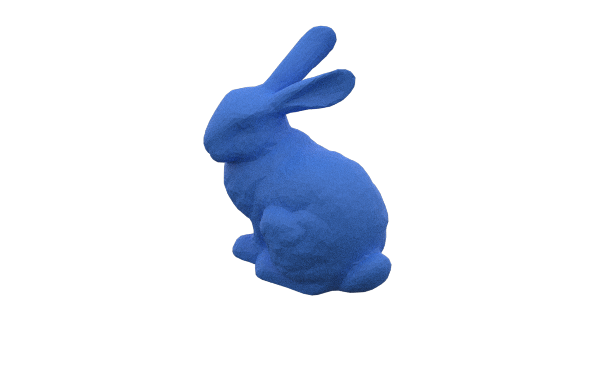

In [4]:
bunny.material = fresnel.material.Material(color=fresnel.color.linear([0.25,0.5,0.9]), roughness=0.6)
scene1.camera = fresnel.camera.Orthographic.fit(scene1,margin=0)
scene1.lights = fresnel.light.cloudy()
fresnel.pathtrace(scene1, samples=200)

Specify position and orientation to instantiate the mesh many times.

In [5]:
scene2 = fresnel.Scene()
bunnies = fresnel.geometry.Mesh(scene2,vertices=verts,N=2)
bunnies.position[:] = [[0,0,0], [-0.11,0,0.1]]
bunnies.orientation[:] = [[1,0,0,0], [0,0,1,0]]

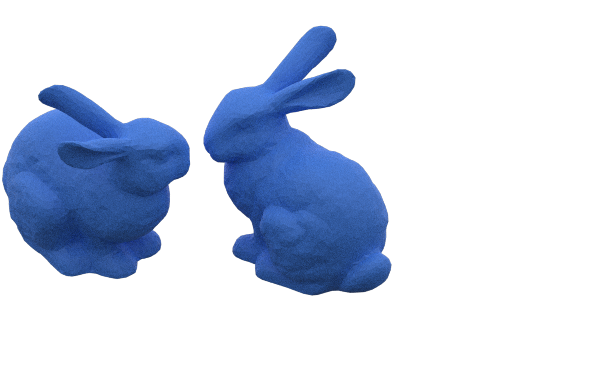

In [6]:
bunnies.material = fresnel.material.Material(color=fresnel.color.linear([0.25,0.5,0.9]), roughness=0.6)
scene2.camera = fresnel.camera.Orthographic.fit(scene1,margin=0)
scene2.lights = fresnel.light.cloudy()
fresnel.pathtrace(scene2, samples=200)

## Color

Specify per vertex colors. These colors are smoothly interpolated across the triangles. Set `primitive_color_mix=1` to choose the per-vertex colors.

Color the bunny based on the y-coordinate of the mesh:

In [7]:
mapper = matplotlib.cm.ScalarMappable(norm = matplotlib.colors.Normalize(vmin=-0.08, vmax=0.05, clip=True),
                                      cmap = matplotlib.cm.get_cmap(name='viridis'))

bunny.color[:] = fresnel.color.linear(mapper.to_rgba(verts[:,1]))
bunny.material.primitive_color_mix = 1.0

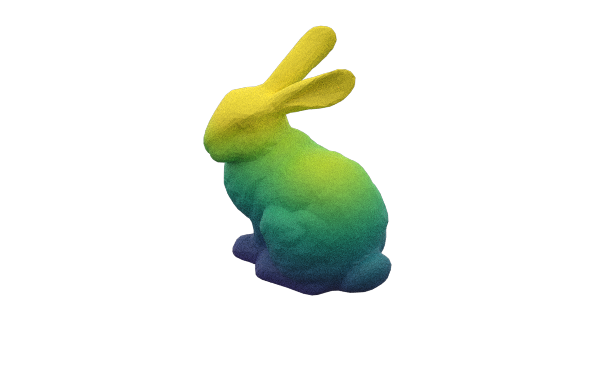

In [8]:
fresnel.pathtrace(scene1, samples=200)

Here is a single triangle demo to demonstrate the interpolation:

In [9]:
scene3 = fresnel.Scene()
triangle = fresnel.geometry.Mesh(scene3,vertices=[[0,0,0],[1,0,0],[0,1,0]],N=1)
triangle.material.solid = 1
triangle.material.primitive_color_mix = 1.0
triangle.color[:] = [[1,0,0], [0,1,0], [0,0,1]]

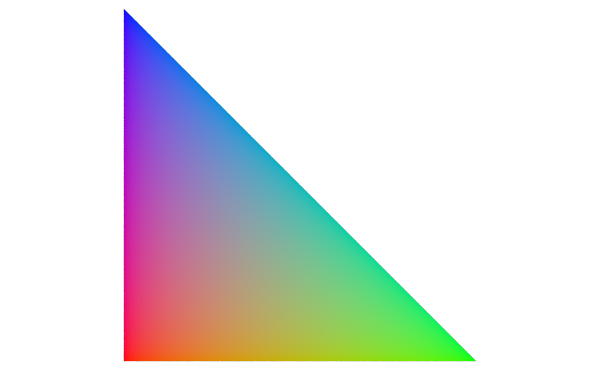

In [10]:
scene3.camera = fresnel.camera.Orthographic.fit(scene3, view='front')
fresnel.preview(scene3)

## Outlines

Outlines are placed on the outer edge of each triangle in the mesh.

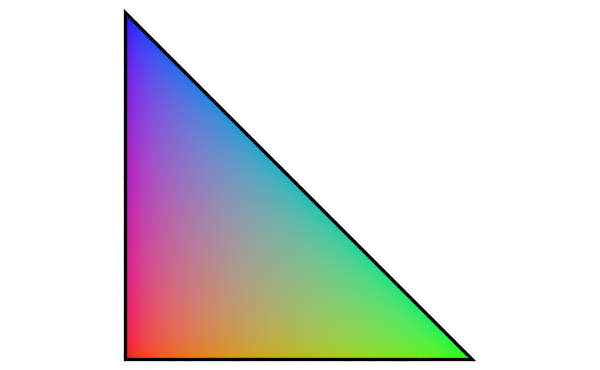

In [11]:
triangle.outline_width=0.01
fresnel.preview(scene3)

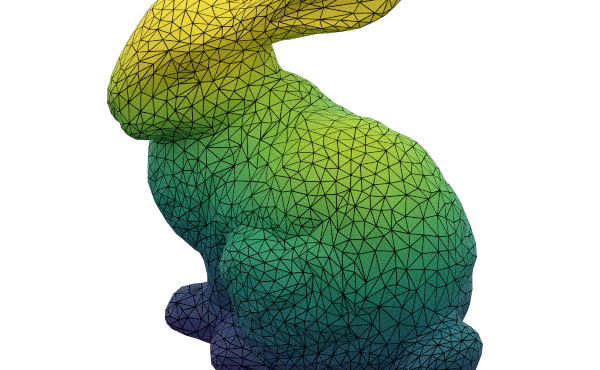

In [12]:
bunny.outline_width=0.0002
scene1.camera.height *= 0.5
fresnel.pathtrace(scene1, samples=200)

This page was generated from a [jupyter](https://jupyter.org/) notebook. You can download and run the notebook locally from the [fresnel-examples](https://github.com/glotzerlab/fresnel-examples) repository.